In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import ast

from scipy.interpolate import make_interp_spline

%matplotlib inline

In [2]:
speeches = pd.read_csv("../data/cleaned_speeches.csv", sep='\t', index_col=0)

In [3]:
speeches.tail()

,year,speaker,speech,n_words
407,1394,موحدی,"['خطيب', 'موقت', 'نماز', 'جمعه', 'تهران', 'بيا...",1264
408,1394,صدیقی,"['خطيب', 'نماز', 'جمعه', 'تهران', 'تصريح', 'کر...",1338
409,1394,موحدی,"['آيت', 'الله', 'موحدي', 'کرماني', 'تأکيد', 'ا...",1047
410,1394,صدیقی,"['خطيب', 'نماز', 'جمعه', 'هفته', 'تهران', 'ذات...",1616
411,1394,جنتی,"['آيت', 'الله', 'احمد', 'جنتي', 'برجام', 'تلقي...",1249


In [4]:
def count_instances(df, word):
    counter = 0
    n_words_mean = df['n_words'].mean()
    for i in range(len(df)):
        row = df.iloc[i]
        for w in ast.literal_eval(row['speech']):
            if word in w:
                counter = counter + 1
    return counter/n_words_mean*1000

In [5]:
YEARS = list(range(1387, 1391)) + list(range(1392, 1399)) + [1400]
CONVERT_Y = 621
YEARS

[1387, 1388, 1389, 1390, 1392, 1393, 1394, 1395, 1396, 1397, 1398, 1400]

In [6]:
def annual_freq(word):
    freqs = []
    for year in YEARS:
        word_count = count_instances(speeches[speeches['year']==year], word)
        freqs.append(word_count / len(speeches[speeches['year']==year]))
    
    return freqs

In [7]:
annual_freq('خامنه')

[0.07844983133286264,
 0.042448650398221405,
 0.02613240418118467,
 0.01391304347826087,
 0.052254794377384124,
 0.05082333807684489,
 0.0,
 0.0818464560484531,
 0.14575842969585073,
 0.0,
 0.33016091756025434,
 0.039447731755424056]

In [8]:
def categorical_freqs(category_w):
    all_freqs = [0] * len(YEARS)
    for w in category_w:
        single_w_freqs = annual_freq(w)
        for i, f in enumerate(single_w_freqs):
            all_freqs[i] = all_freqs[i] + f
    
    for i, _ in enumerate(all_freqs):
        all_freqs[i] = all_freqs[i] / len(category_w)
            
    return all_freqs

In [9]:
def plot_freqs(title, freqs):
    years_g = [y+CONVERT_Y for y in YEARS]
    X_Y_Spline = make_interp_spline(years_g, freqs)
    X_ = np.linspace(years_g[0], years_g[-1], 500)
    Y_ = X_Y_Spline(X_)
    
    plt.figure(figsize=(7,5))
    plt.plot(X_, Y_, color='maroon', linewidth=2)
    plt.axvline(x=1391.8+CONVERT_Y, linestyle='dotted', color='gray')
    plt.axvline(x=1396+CONVERT_Y, linestyle='dotted', color='gray')
    plt.title(title)
    plt.xlabel("Years")
    plt.ylabel("Frequency")

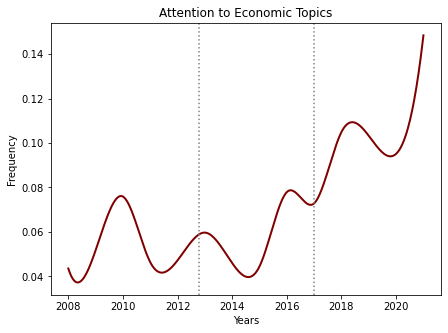

In [32]:
economic_w = ['گرانی', 'تورم', 'اقتصاد', 'تحریم' , 'فقر', 'قیمت', 'بورس', 'مالیات', 'فاصله', 'کارگر',
              'کسب و کار', 'افساد', 'بازار', 'ریال', 'یورو', 'صادرات', 'واردات', 'مفاسد', 'مسکن مهر', 'یارانه', 'دلار']
economic_freqs = categorical_freqs(economic_w)
plot_freqs('Attention to Economic Topics', economic_freqs)

In [33]:
len(economic_w)

21

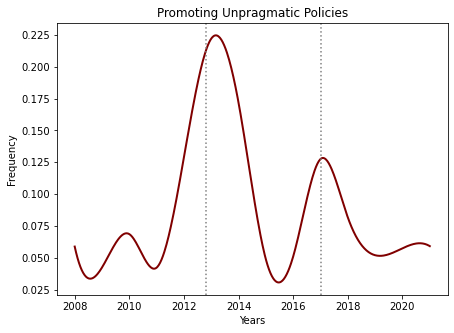

In [36]:
unpragmatic_w = ['مقاومتی', 'بانک', 'کفایی', 'هسته', 'استقلال', 'سودبانکی', 'توسعه اسلامی', 'الگوی پیشرفت']
unpragmatic_freqs = categorical_freqs(unpragmatic_w)
plot_freqs('Promoting Unpragmatic Policies', unpragmatic_freqs)

In [37]:
len(unpragmatic_w)

8

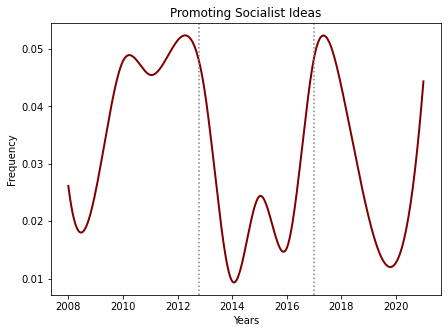

In [42]:
socialist_w = ['بیمه', 'جهادی', 'بسیج', 'کوپن', 'صدقه', 'پول', 'لوکس', 'کارگر', 'آقازاده', 'طبقاتی',
              'اشتغال', 'سوسیالیس', 'کمونیس', 'اتحادیه', 'مشاغل', 'فقرا']
socialist_freqs = categorical_freqs(socialist_w)
plot_freqs('Promoting Socialist Ideas', socialist_freqs)

In [43]:
len(socialist_w)

16

In [16]:
# Values taken form the World Bank
iran_gdp = [416397025729.361, 486807615326.147, 580764902917.439, 598868460912.847, 460293149324.326,
            432687036177.818, 384951479697.42, 417983583565.54, 445345256459.105, 294356680624.658,
            258245497664.394, 294356680624.658]
len(iran_gdp)

12

Text(0, 0.5, 'GDP (Billion USD)')

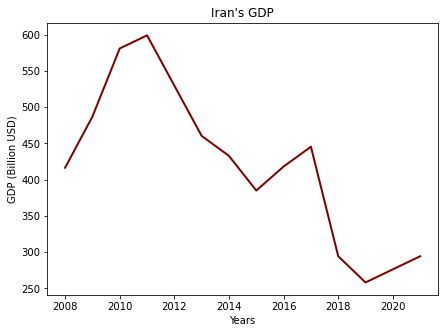

In [17]:
plt.figure(figsize=(7,5))
years_g = [y+CONVERT_Y for y in YEARS]
iran_gdp_g = [gdp/1000000000 for gdp in iran_gdp]
plt.plot(years_g, iran_gdp_g, color='maroon', linewidth=2)
plt.title("Iran's GDP")
plt.xlabel("Years")
plt.ylabel("GDP (Billion USD)")

In [18]:
# Without elections:

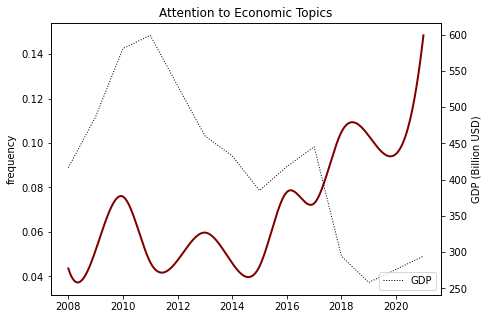

In [47]:
years_g = [y+CONVERT_Y for y in YEARS]
X_Y_Spline = make_interp_spline(years_g, economic_freqs)
X_ = np.linspace(years_g[0], years_g[-1], 500)
Y_ = X_Y_Spline(X_)



fig, ax1 = plt.subplots()
fig.set_size_inches(7, 5)

ax2 = ax1.twinx()

ax1.set_ylabel('frequency', color='black')
ax1.plot(X_, Y_, color='maroon', linewidth=2, label='frequency')
ax1.tick_params(axis='y', labelcolor='black')


ax2.plot(years_g, iran_gdp_g, color='black', linewidth=1, linestyle='dotted', label='GDP')
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylabel('GDP (Billion USD)', color='black')
ax2.set_xlabel('Years', color='gray')
ax2.legend(loc='lower right')

plt.title("Attention to Economic Topics")
plt.xlabel("Years")

plt.show();

Text(0, 0.5, 'Frequency')

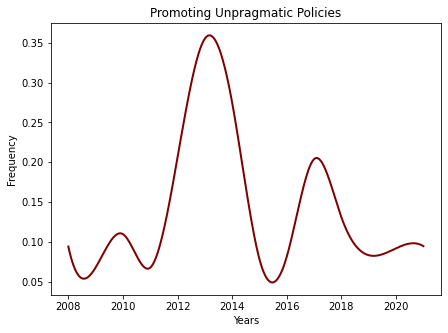

In [20]:
years_g = [y+CONVERT_Y for y in YEARS]
X_Y_Spline = make_interp_spline(years_g, unpragmatic_freqs)
X_ = np.linspace(years_g[0], years_g[-1], 500)
Y_ = X_Y_Spline(X_)

plt.figure(figsize=(7,5))
plt.plot(X_, Y_, color='maroon', linewidth=2)
plt.title('Promoting Unpragmatic Policies')
plt.xlabel("Years")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

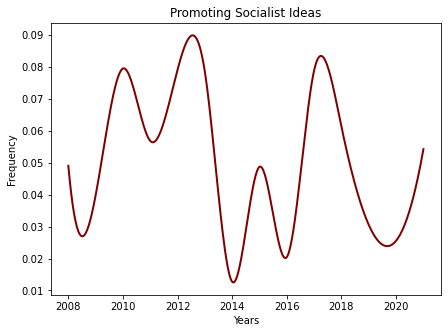

In [21]:
years_g = [y+CONVERT_Y for y in YEARS]
X_Y_Spline = make_interp_spline(years_g, socialist_freqs)
X_ = np.linspace(years_g[0], years_g[-1], 500)
Y_ = X_Y_Spline(X_)

plt.figure(figsize=(7,5))
plt.plot(X_, Y_, color='maroon', linewidth=2)
plt.title('Promoting Socialist Ideas')
plt.xlabel("Years")
plt.ylabel("Frequency")